In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
!pip install livelossplot

In [7]:
from livelossplot import PlotLossesKeras

## Streak case

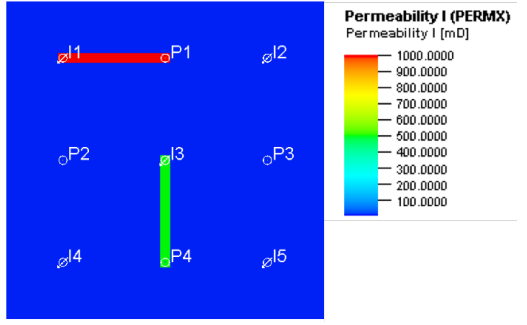

In [8]:
prod_streak = pd.read_excel('./Streak/Production_streak.xlsx')
inj_streak = pd.read_excel('./Streak/Injection_streak.xlsx')

In [9]:
inj_streak

,Date,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [10]:
prod_streak

,Date,P1,P2,P3,P4
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823
...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443


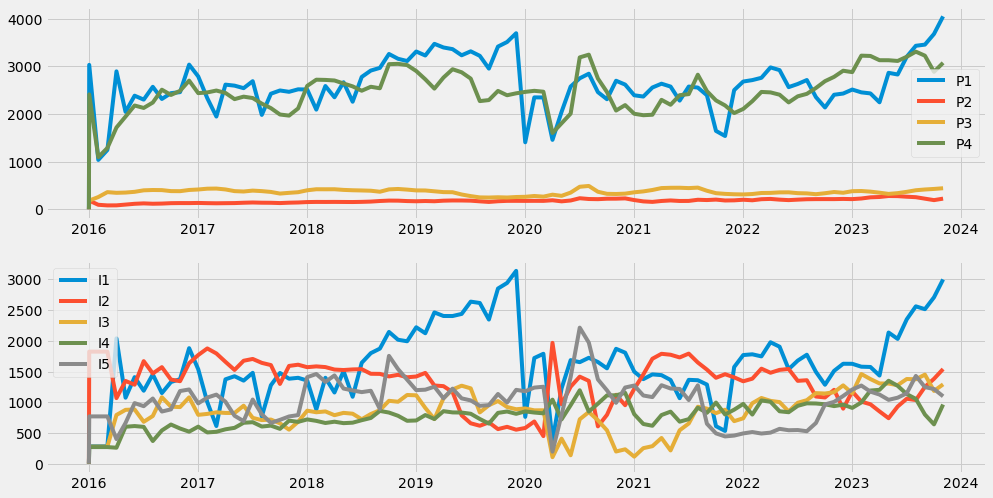

In [11]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_streak.Date,prod_streak.P1, label='P1')
ax[0].plot(prod_streak.Date,prod_streak.P2, label='P2')
ax[0].plot(prod_streak.Date,prod_streak.P3, label='P3')
ax[0].plot(prod_streak.Date,prod_streak.P4, label='P4')
ax[0].legend()


ax[1].plot(inj_streak.Date,inj_streak.I1, label='I1')
ax[1].plot(inj_streak.Date,inj_streak.I2, label='I2')
ax[1].plot(inj_streak.Date,inj_streak.I3, label='I3')
ax[1].plot(inj_streak.Date,inj_streak.I4, label='I4')
ax[1].plot(inj_streak.Date,inj_streak.I5, label='I5')
ax[1].legend()

In [12]:
# train test split
try:
    
    inj_streak = inj_streak.drop(columns=['Date'])
except KeyError:
    inj_nonstreak
    
    
streak = pd.concat([prod_streak,inj_streak],axis=1)
streak

,Date,P1,P2,P3,P4,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [13]:
# train size = 60%

#streak_val = streak.drop(columns=['Time days'])
train_stop = 60
train, test = streak.iloc[:train_stop,5:].values,streak.iloc[train_stop:,5:].values
streak_p1_train, streak_p1_test = streak.iloc[:train_stop,1].values,streak.iloc[train_stop:,1].values
streak_p2_train, streak_p2_test = streak.iloc[:train_stop,2].values,streak.iloc[train_stop:,2].values
streak_p3_train, streak_p3_test = streak.iloc[:train_stop,3].values,streak.iloc[train_stop:,3].values
streak_p4_train, streak_p4_test = streak.iloc[:train_stop,4].values,streak.iloc[train_stop:,4].values

In [14]:
def scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data,sc

def production_preprocessing(data,train_stop,number_of_p_well = 1):
    train, test = data.iloc[:train_stop,5:].values,data.iloc[train_stop:,5:].values
    p_train,p_test = data.iloc[:train_stop,number_of_p_well].values,data.iloc[train_stop:,number_of_p_well].values
    
    x_train,y_train =np.column_stack((train,p_train)),p_train
    x_test,y_test =np.column_stack((test,p_test)),p_test
    
    x_train_scaled,x_train_sc = scaling(x_train)
    x_test_scaled,x_test_sc = scaling(x_test)
    y_test_scaled,y_test_sc = scaling(y_test.reshape(-1,1))
    y_train_scaled,y_train_sc = scaling(y_train.reshape(-1,1))
    
    
    x_train_scaled,y_train_scaled = x_train_scaled.reshape((60,1,6)), y_train_scaled.reshape(60,1,1)
    x_test_scaled,y_test_scaled = x_test_scaled.reshape((36,1,6)), y_test_scaled.reshape(36,1)
    return x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

# Non streak case

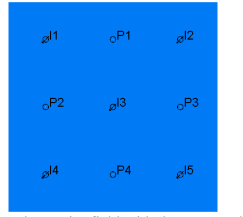

In [15]:
prod_nonstreak = pd.read_excel('./Non_Streak/Production_nonstreak.xlsx')
inj_nonstreak = pd.read_excel('./Non_Streak/Injection_nonstreak.xlsx')

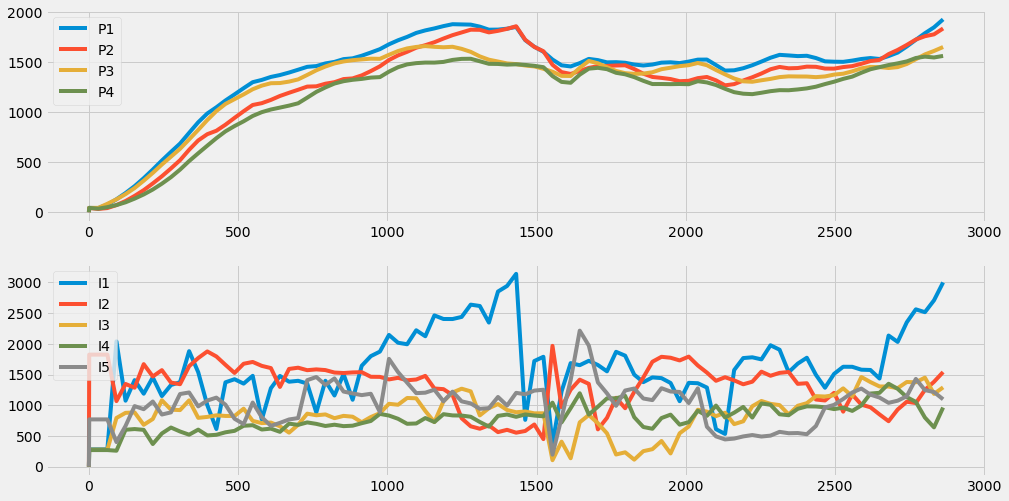

In [16]:
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P1, label='P1')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P2, label='P2')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P3, label='P3')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P4, label='P4')
ax[0].legend()

ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I1, label='I1')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I2, label='I2')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I3, label='I3')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I4, label='I4')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I5, label='I5')
ax[1].legend()

In [17]:
# train test split
try:
    
    inj_nonstreak = inj_nonstreak.drop(columns=['Time [days]'])
except KeyError:
    inj_nonstreak
    
    
non_streak = pd.concat([prod_nonstreak,inj_nonstreak],axis=1)
non_streak

,Time [days],P1,P2,P3,P4,I1,I2,I3,I4,I5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,42.794113,42.794086,42.794121,42.794094,284.662415,1824.588013,278.588287,270.050903,769.642883
2,31.430000,41.098396,32.640354,43.460705,34.996902,284.674286,1824.665039,278.600098,270.062286,769.675415
3,61.867500,74.807091,41.005371,83.802605,50.165264,284.674286,1824.665039,278.600098,270.062286,769.675415
4,92.305000,129.125595,71.362114,128.713333,70.953720,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2740.367432,1658.946777,1674.509155,1483.775879,1509.722290,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2770.805420,1726.047363,1728.648315,1531.512329,1543.862793,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2801.242432,1791.977295,1761.811523,1579.751099,1557.398682,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2831.679443,1850.891846,1780.687378,1614.357544,1549.049438,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [18]:
# train size = 60%

#non_streak_val = non_streak.drop(columns=['Time days'])
train_stop = 60
train, test = non_streak.iloc[:train_stop,5:].values,non_streak.iloc[train_stop:,5:].values
non_streak_p1_train, non_streak_p1_test = non_streak.iloc[:train_stop,1].values,non_streak.iloc[train_stop:,1].values
non_streak_p2_train, non_streak_p2_test = non_streak.iloc[:train_stop,2].values,non_streak.iloc[train_stop:,2].values
non_streak_p3_train, non_streak_p3_test = non_streak.iloc[:train_stop,3].values,non_streak.iloc[train_stop:,3].values
non_streak_p4_train, non_streak_p4_test = non_streak.iloc[:train_stop,4].values,non_streak.iloc[train_stop:,4].values

In [19]:
x_train_p1,y_train_p1 =np.column_stack((train,non_streak_p1_train)),non_streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,non_streak_p2_train)),non_streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,non_streak_p3_train)),non_streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,non_streak_p4_train)),non_streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,non_streak_p1_test)),non_streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,non_streak_p2_test)),non_streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,non_streak_p3_test)),non_streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,non_streak_p4_test)),non_streak_p4_test

In [20]:
p1 = production_preprocessing(non_streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(non_streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(non_streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(non_streak,train_stop,number_of_p_well = 4) 

# Reccurent neural network

# LSTM neural network

In [151]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.4,
    "lstm_units": 90,
    "epochs": 200,
    "batch_size": 6,
    "es_patience" : 10
}


def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(256,return_sequences=True, input_shape=(input_shape, 6)))
    model.add(Dropout(params['dropout']))
   # model.add(BatchNormalization())
    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(params['dropout']))
  #  model.add(BatchNormalization())
    model.add(LSTM(256,return_sequences=True))
#    model.add(Dropout(params['dropout']))
   # model.add(BatchNormalization())
    model.add(LSTM(256,return_sequences=True))
 #   model.add(Dropout(params['dropout']))
  #  model.add(BatchNormalization())
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1))
    
    
    
    model.compile(loss=params["loss"],
              optimizer=params["optimizer"],
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    
    

    return model

In [152]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [153]:
model1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_152 (LSTM)             (None, 1, 256)            269312    
                                                                 
 dropout_144 (Dropout)       (None, 1, 256)            0         
                                                                 
 lstm_153 (LSTM)             (None, 1, 256)            525312    
                                                                 
 dropout_145 (Dropout)       (None, 1, 256)            0         
                                                                 
 lstm_154 (LSTM)             (None, 1, 256)            525312    
                                                                 
 lstm_155 (LSTM)             (None, 1, 256)            525312    
                                                                 
 lstm_156 (LSTM)             (None, 1, 128)          

In [154]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', 
patience=params["es_patience"])

# Prediction for non streak case

In [155]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 11s 445ms/step - loss: 0.9976 - root_mean_squared_error: 0.9988 - mean_absolute_error: 0.8079 - val_loss: 0.9875 - val_root_mean_squared_error: 0.9937 - val_mean_absolute_error: 0.6662
Epoch 2/200
10/10 [==============================] - 0s 46ms/step - loss: 0.9076 - root_mean_squared_error: 0.9527 - mean_absolute_error: 0.7699 - val_loss: 0.7807 - val_root_mean_squared_error: 0.8836 - val_mean_absolute_error: 0.5930
Epoch 3/200
10/10 [==============================] - 0s 47ms/step - loss: 0.3601 - root_mean_squared_error: 0.6001 - mean_absolute_error: 0.4917 - val_loss: 0.7145 - val_root_mean_squared_error: 0.8453 - val_mean_absolute_error: 0.7062
Epoch 4/200
10/10 [==============================] - 0s 50ms/step - loss: 0.2276 - root_mean_squared_error: 0.4771 - mean_absolute_error: 0.3682 - val_loss: 0.4055 - val_root_mean_squared_error: 0.6368 - val_mean_absolute_error: 0.4308
Epoch 5/200
10/10 [==============================] - 0

Epoch 10/200
10/10 [==============================] - 0s 46ms/step - loss: 0.0330 - root_mean_squared_error: 0.1817 - mean_absolute_error: 0.1328 - val_loss: 0.1366 - val_root_mean_squared_error: 0.3696 - val_mean_absolute_error: 0.2684
Epoch 11/200
10/10 [==============================] - 0s 46ms/step - loss: 0.0361 - root_mean_squared_error: 0.1899 - mean_absolute_error: 0.1325 - val_loss: 0.1226 - val_root_mean_squared_error: 0.3501 - val_mean_absolute_error: 0.2629
Epoch 12/200
10/10 [==============================] - 0s 44ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - mean_absolute_error: 0.1015 - val_loss: 0.1315 - val_root_mean_squared_error: 0.3626 - val_mean_absolute_error: 0.2481
Epoch 13/200
10/10 [==============================] - 0s 48ms/step - loss: 0.0190 - root_mean_squared_error: 0.1380 - mean_absolute_error: 0.1011 - val_loss: 0.1067 - val_root_mean_squared_error: 0.3266 - val_mean_absolute_error: 0.2258
Epoch 14/200
10/10 [==============================] 

Epoch 21/200
10/10 [==============================] - 0s 44ms/step - loss: 0.0196 - root_mean_squared_error: 0.1400 - mean_absolute_error: 0.1013 - val_loss: 0.0993 - val_root_mean_squared_error: 0.3151 - val_mean_absolute_error: 0.2151
Epoch 22/200
10/10 [==============================] - 0s 45ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - mean_absolute_error: 0.0958 - val_loss: 0.1101 - val_root_mean_squared_error: 0.3318 - val_mean_absolute_error: 0.1907
Epoch 23/200
10/10 [==============================] - 0s 43ms/step - loss: 0.0166 - root_mean_squared_error: 0.1287 - mean_absolute_error: 0.1005 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3448 - val_mean_absolute_error: 0.2048
Epoch 24/200
10/10 [==============================] - 0s 45ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - mean_absolute_error: 0.1048 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3436 - val_mean_absolute_error: 0.2205
Epoch 25/200
10/10 [==============================] 

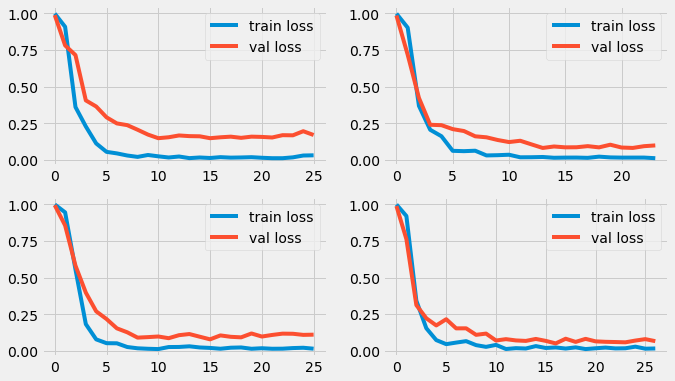

In [156]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [157]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p4[4].inverse_transform(pred.reshape(-1,1))

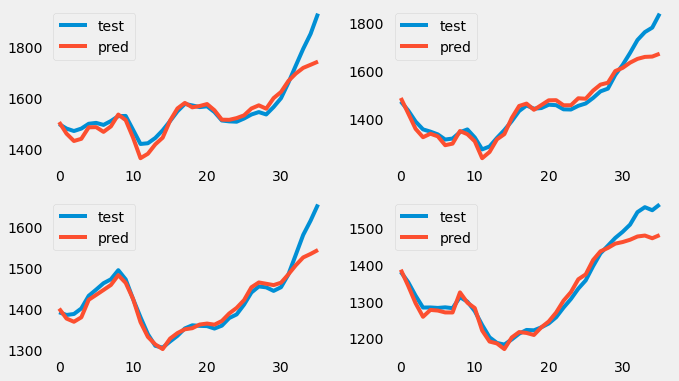

In [158]:
#y_test_p1 = sc_p1_y_test.inverse_transform(y_test_p1 .reshape(-1,1))

fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()

In [159]:
def rmse(test,pred):
    rmse = np.sqrt(((test-pred)**2/len(test)).sum())
    return rmse

rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

885.9371285874375
0.8885855833049239


In [169]:
from sklearn.metrics import mean_absolute_error

In [175]:
print('rmse',rmse(y_test_p1,pred_inv1))
print('MAE',mean_absolute_error(y_test_p1,pred_inv1))

rmse 866.7745613720596
MAE 28.536509195964097


In [176]:
print('rmse',rmse(y_test_p2,pred_inv2))
print('MAE',mean_absolute_error(y_test_p2,pred_inv2))

rmse 1144.0161811339506
MAE 30.17038642035639


In [177]:
print('rmse',rmse(y_test_p3,pred_inv3))
print('MAE',mean_absolute_error(y_test_p3,pred_inv3))

rmse 616.5733152011215
MAE 15.990858289930834


In [178]:
print('rmse',rmse(y_test_p4,pred_inv4))
print('MAE',mean_absolute_error(y_test_p4,pred_inv4))

rmse 916.3844566426183
MAE 19.80289035373264


In [168]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

24326.519916661822


# Prediction for streak case

In [179]:
p1 = production_preprocessing(streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(streak,train_stop,number_of_p_well = 4) 


x_train_p1,y_train_p1 =np.column_stack((train,streak_p1_train)),streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,streak_p2_train)),streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,streak_p3_train)),streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,streak_p4_train)),streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,streak_p1_test)),streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,streak_p2_test)),streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,streak_p3_test)),streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,streak_p4_test)),streak_p4_test

In [180]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [181]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 11s 307ms/step - loss: 0.9996 - root_mean_squared_error: 0.9998 - mean_absolute_error: 0.7166 - val_loss: 0.9945 - val_root_mean_squared_error: 0.9972 - val_mean_absolute_error: 0.6878
Epoch 2/200
10/10 [==============================] - 1s 53ms/step - loss: 0.9651 - root_mean_squared_error: 0.9824 - mean_absolute_error: 0.7039 - val_loss: 0.8818 - val_root_mean_squared_error: 0.9390 - val_mean_absolute_error: 0.6476
Epoch 3/200
10/10 [==============================] - 1s 52ms/step - loss: 0.6104 - root_mean_squared_error: 0.7813 - mean_absolute_error: 0.5402 - val_loss: 0.3126 - val_root_mean_squared_error: 0.5591 - val_mean_absolute_error: 0.4532
Epoch 4/200
10/10 [==============================] - 1s 58ms/step - loss: 0.3587 - root_mean_squared_error: 0.5989 - mean_absolute_error: 0.4119 - val_loss: 0.2414 - val_root_mean_squared_error: 0.4913 - val_mean_absolute_error: 0.4031
Epoch 5/200
10/10 [==============================] - 1

Epoch 2/200
10/10 [==============================] - 1s 52ms/step - loss: 0.9361 - root_mean_squared_error: 0.9675 - mean_absolute_error: 0.7262 - val_loss: 0.7934 - val_root_mean_squared_error: 0.8907 - val_mean_absolute_error: 0.6829
Epoch 3/200
10/10 [==============================] - 1s 53ms/step - loss: 0.4097 - root_mean_squared_error: 0.6401 - mean_absolute_error: 0.4471 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mean_absolute_error: 0.2488
Epoch 4/200
10/10 [==============================] - 0s 51ms/step - loss: 0.2743 - root_mean_squared_error: 0.5237 - mean_absolute_error: 0.3306 - val_loss: 0.0836 - val_root_mean_squared_error: 0.2891 - val_mean_absolute_error: 0.2380
Epoch 5/200
10/10 [==============================] - 1s 52ms/step - loss: 0.1117 - root_mean_squared_error: 0.3342 - mean_absolute_error: 0.2151 - val_loss: 0.1280 - val_root_mean_squared_error: 0.3578 - val_mean_absolute_error: 0.2608
Epoch 6/200
10/10 [==============================] - 1s 

Epoch 37/200
10/10 [==============================] - 1s 57ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - mean_absolute_error: 0.1024 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982 - val_mean_absolute_error: 0.0699
Epoch 38/200
10/10 [==============================] - 1s 58ms/step - loss: 0.0159 - root_mean_squared_error: 0.1263 - mean_absolute_error: 0.0954 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169 - val_mean_absolute_error: 0.0893
Epoch 39/200
10/10 [==============================] - 1s 57ms/step - loss: 0.0334 - root_mean_squared_error: 0.1827 - mean_absolute_error: 0.1260 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365 - val_mean_absolute_error: 0.0993
Epoch 40/200
10/10 [==============================] - 1s 54ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - mean_absolute_error: 0.0959 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1573 - val_mean_absolute_error: 0.1210
Epoch 41/200
10/10 [==============================] 

Epoch 31/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0326 - root_mean_squared_error: 0.1804 - mean_absolute_error: 0.1361 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1955 - val_mean_absolute_error: 0.1367
Epoch 32/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - mean_absolute_error: 0.1115 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1901 - val_mean_absolute_error: 0.1487
Epoch 33/200
10/10 [==============================] - 1s 68ms/step - loss: 0.0272 - root_mean_squared_error: 0.1650 - mean_absolute_error: 0.1155 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149 - val_mean_absolute_error: 0.1691
Epoch 34/200
10/10 [==============================] - 1s 57ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418 - mean_absolute_error: 0.1021 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575 - val_mean_absolute_error: 0.1158
Epoch 35/200
10/10 [==============================] 

Epoch 14/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0367 - root_mean_squared_error: 0.1916 - mean_absolute_error: 0.1264 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653 - val_mean_absolute_error: 0.1240
Epoch 15/200
10/10 [==============================] - 0s 51ms/step - loss: 0.0249 - root_mean_squared_error: 0.1579 - mean_absolute_error: 0.1097 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601 - val_mean_absolute_error: 0.1299
Epoch 16/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0398 - root_mean_squared_error: 0.1996 - mean_absolute_error: 0.1418 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mean_absolute_error: 0.2610
Epoch 17/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0396 - root_mean_squared_error: 0.1989 - mean_absolute_error: 0.1495 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413 - val_mean_absolute_error: 0.1111
Epoch 18/200
10/10 [==============================] 

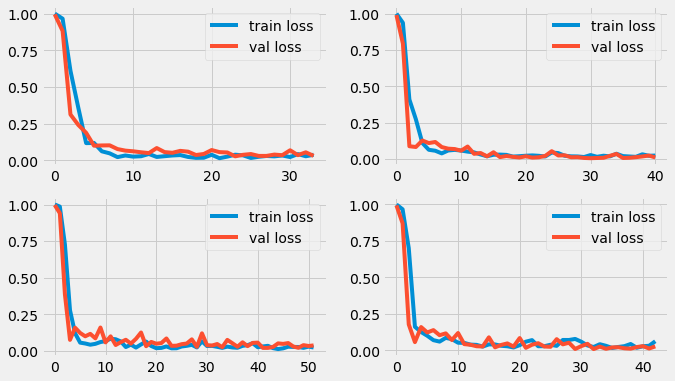

In [182]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [183]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p4[4].inverse_transform(pred.reshape(-1,1))

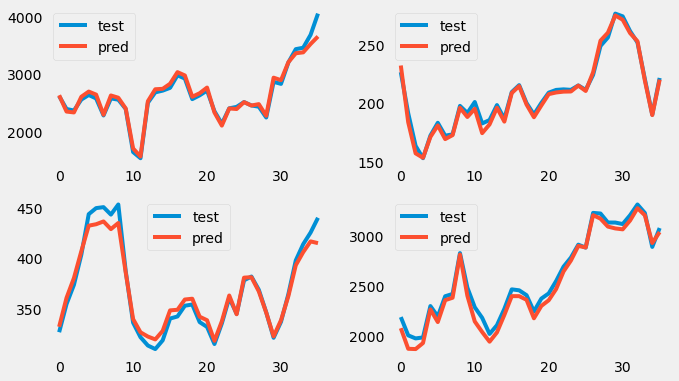

In [184]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()


In [185]:
print('rmse',rmse(y_test_p1,pred_inv1))
print('MAE',mean_absolute_error(y_test_p1,pred_inv1))

rmse 3878.1377996163355
MAE 52.90709771050264


In [186]:
print('rmse',rmse(y_test_p2,pred_inv2))
print('MAE',mean_absolute_error(y_test_p2,pred_inv2))

rmse 256.41260775130473
MAE 2.5229814317491903


In [187]:
print('rmse',rmse(y_test_p3,pred_inv3))
print('MAE',mean_absolute_error(y_test_p3,pred_inv3))

rmse 348.3436893714245
MAE 6.573629591200079


In [188]:
print('rmse',rmse(y_test_p4,pred_inv4))
print('MAE',mean_absolute_error(y_test_p4,pred_inv4))

rmse 3670.7672565043054
MAE 59.15283881293632


In [36]:
rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

1938.0371487964494
0.9632967393763733


In [37]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

3312.5552071754655


In [38]:
rmse(y_test_p1,pred_inv1)

3765.0868433524092